# 4.　単回帰

## 4.1　散布図に線を引く

- URL : http://kogolab.chillout.jp/elearn/icecream/chap4/sec1.html
- テーマ
   1. 読み物オンリーページ
       - 「母集団」と「標本集団」の解説
       
## 3.2　標本集団の相関係数

- URL : http://kogolab.chillout.jp/elearn/icecream/chap3/sec2.html
- テーマ
   1. 相関係数関連の復習
       - 散布図行列、相関係数

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4147104a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd41216b2b0>]], dtype=object)

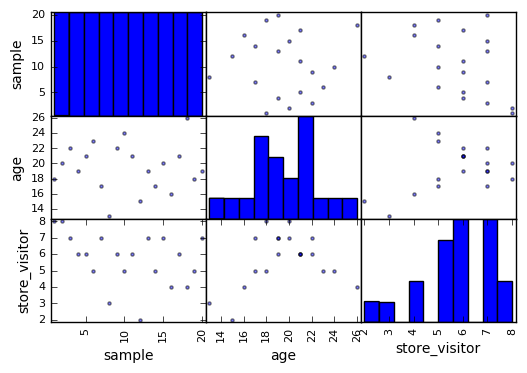

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math

# csvからデータの読み込み
df_1 = pd.read_csv('./data/chapter3-2.csv')

# 散布図行列を書く
pd.tools.plotting.scatter_matrix(df_1)